
# Weighted Graph


An example using Graph as a weighted network.



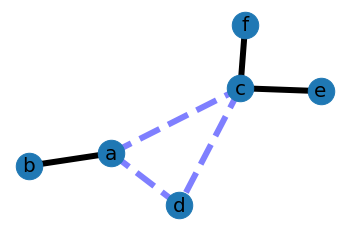

In [1]:
# Author: Aric Hagberg (hagberg@lanl.gov)
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
test = {'A':[1,2,3,4,5],'B':[3,4,5,6,7],'C':[5,5,8,2,4],'D':[6,2,8,5,3],'E':[7,4,2,3,1]}

In [5]:
df = pd.DataFrame(test)
df

,A,B,C,D,E
0,1,3,5,6,7
1,2,4,5,2,4
2,3,5,8,8,2
3,4,6,2,5,3
4,5,7,4,3,1


In [6]:
corr = df.corr()

In [17]:
corr

,A,B,C,D,E
A,1.000000,1.000000,-0.364662,-0.198680,-0.892844
B,1.000000,1.000000,-0.364662,-0.198680,-0.892844
C,-0.364662,-0.364662,1.000000,0.521648,-0.030054
D,-0.198680,-0.198680,0.521648,1.000000,0.109163
E,-0.892844,-0.892844,-0.030054,0.109163,1.000000


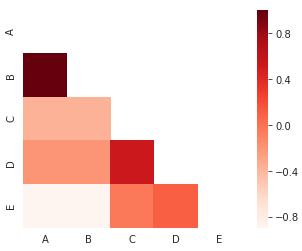

In [9]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,cmap="Reds")

In [10]:
index_name = corr.columns.tolist()

In [11]:
G = nx.Graph()

In [30]:
df['A'][3]

4

In [32]:
x = 0
y = 0
for i in index_name:
    for j in index_name:
        G.add_edge(i,j
                   ,weight= df[i][x])
        y += 1
    x += 1

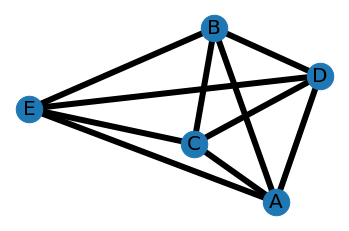

In [33]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()